# A basic example of a full neural network

Below is a simple example of how to code a neural network using keras tensor flow.

In [1]:
# Import tensorflow and keras
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats, odr

from sklearn.model_selection import train_test_split

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (12.0/2.5, 8.0/2.5)

# this is for running in colaboratory
# show plots inline
#%matplotlib inline    
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [2]:
# random numbers
get_ipython().run_line_magic('env', 'PYTHONHASHSEED=99')
# %env PYTHONHASHSEED=99
np.random.seed(99)
tf.random.set_seed(99)

env: PYTHONHASHSEED=99


## Linear regression example

In [3]:
url = 'https://github.com/chasinginfinity/ml-from-scratch/raw/master/02%20Linear%20Regression%20using%20Gradient%20Descent/data.csv'
data = pd.read_csv(url)
x = np.array(data.iloc[:, 0])
y = np.array(data.iloc[:, 1])
x = (x-np.mean(x))/np.std(x)
y = (y-np.mean(y))/np.std(y)


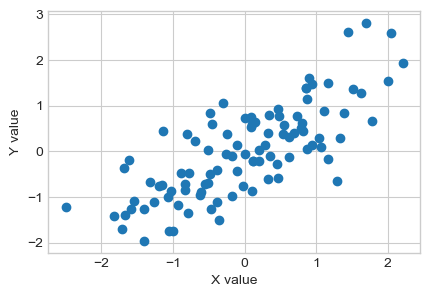

In [4]:
x = np.expand_dims(x, axis=1)
y = np.expand_dims(y, axis=1)

plt.scatter(x, y)
plt.xlabel('X value')
plt.ylabel('Y value')
plt.show()

In [5]:
# Example: build a simple, fully-connected network 
# (aka multi-layer perceptron).
# Nodes of each layer are connected to all nodes of the next layer.

# In Keras a NN model is built in layers. 
# Most common type is sequential layers - one layer after the other with 
# connections only between neighboring layers.

# define the model
tf.keras.backend.clear_session()
model = tf.keras.Sequential()

model.add(layers.Dense(1, activation='linear'))

model.compile(optimizer=keras.optimizers.Adam(0.01),  # Adam optimizer
            loss='mse',       # mean squared error
            metrics=['mae'])  # mean absolute error

# Now train the model
# training input: x
# training output: y  
# Train on batches of 64 samples (chunk size).
# Epochs: run through all training data that many times. Order gets shuffled.

x_train, x_val, y_train, y_val = train_test_split(x,y,test_size = .2, shuffle=True, random_state = 12)
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

history = model.fit(x_train, y_train, epochs=250, batch_size=64, verbose=0, validation_data=(x_val,y_val), shuffle=True)   
print('done training')

(79, 1)
(79, 1)
(20, 1)
(20, 1)
done training


dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


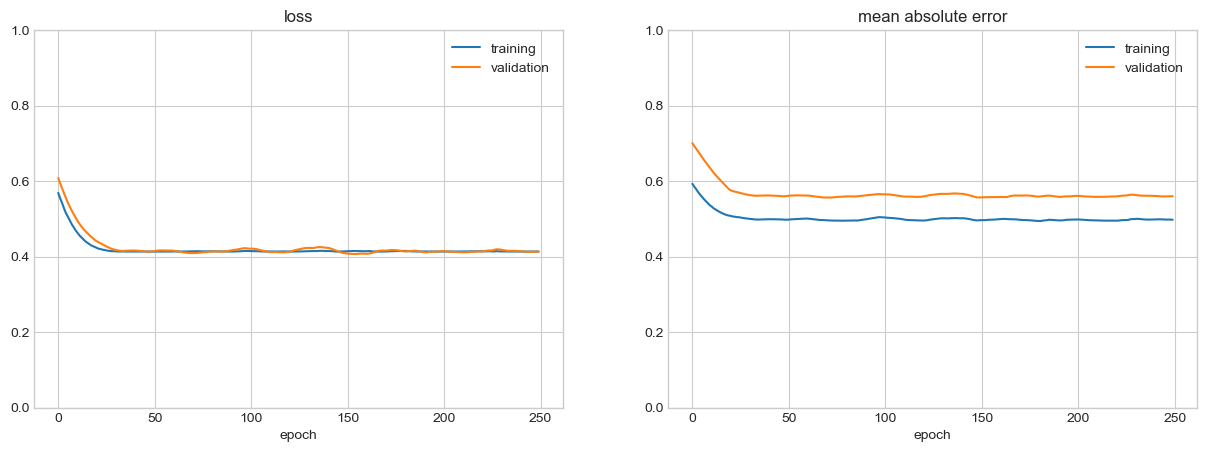

In [6]:
#from keras.callbacks import history 
print(history.history.keys())

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label = 'training')
plt.plot(history.history['val_loss'], label = 'validation')
plt.title('loss')
plt.xlabel('epoch')
plt.legend()
plt.ylim(0,1.)

plt.subplot(1,2,2)
plt.plot(history.history['mae'],label = 'training')
plt.plot(history.history['val_mae'], label = 'validation')
plt.title('mean absolute error')
plt.xlabel('epoch')
plt.legend()
plt.ylim(0,1.)

plt.show()

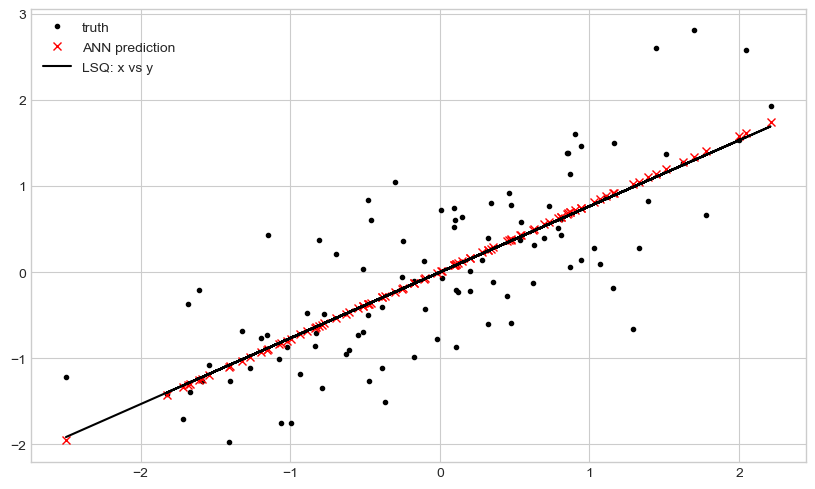

In [7]:
# output predictions based on input x
ypred = model.predict(x)

# plot predicted values
plt.figure(figsize=(10,6))
plt.plot(x, y, '.', color='black', label='truth')
plt.plot(x, ypred, 'x', color='red', label='ANN prediction')

slope, intercept, r_value, p_value, std_err = stats.linregress(np.squeeze(x),np.squeeze(y))
plt.plot(x,intercept+x*slope,'-',color = 'black', label = 'LSQ: x vs y')
plt.legend()

#plt.ylim(0,120)
#plt.xlim(0,120)

plt.show()

## A non-linear, more interesting example

In [8]:
# define a function to be approximated
def my_function(x):
    return np.round(np.sin(1.15*x * np.pi))
    #return np.abs(np.sin(x * np.pi/2))
    #return np.sin(x * np.pi/2)

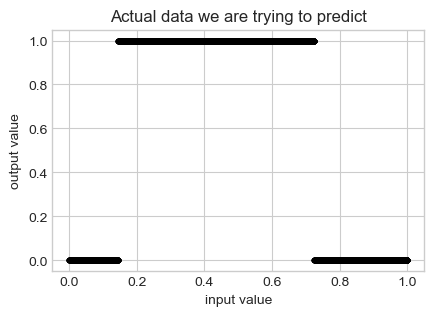

In [9]:
# make some "truth" data
# generate lots of sample pairs (x, f(x))

n_samples = 10000
x = np.random.random((n_samples,1))
y = my_function(x)  

# plot the (x,y) pairs.
plt.figure()
plt.plot(x, y, '.', color='black')
plt.title('Actual data we are trying to predict')
plt.xlabel('input value')
plt.ylabel('output value')
plt.show()

In [10]:
# Example: build a simple, fully-connected network 
# (aka multi-layer perceptron).
# Nodes of each layer are connected to all nodes of the next layer.

# In Keras a NN model is built in layers. 
# Most common type is sequential layers - one layer after the other with 
# connections only between neighboring layers.

# number of units in each layer
n_units = 16

# define the model
tf.keras.backend.clear_session()
model = tf.keras.Sequential()

# Input layer is defined later

# First hidden layer: densely-connected layer with n_units units and activation function 'relu'.
model.add(layers.Dense(n_units, activation='relu'))
#model.add(layers.Dense(1, activation='linear'))

# Second hidden layer:
model.add(layers.Dense(n_units, activation='relu'))

# final layer:  just 1 node and no activation function
model.add(layers.Dense(1,activation=None))

model.compile(optimizer=keras.optimizers.Adam(0.01),  # Adam optimizer
            loss='mae',       # mean absolute error = mae
            metrics=['mse'])  # mean squared error = mse

# Now train the model
# training input: x
# training output: y  
# Train on batches of 128 samples (chunk size).
# Epochs: run through all training data that many times. Order gets shuffled.
n_epochs = 200

history = model.fit(x, y, epochs=n_epochs, batch_size=128, verbose=0, validation_split=0.2, shuffle=True)
print('done training')

# print(model.summary())

done training


dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


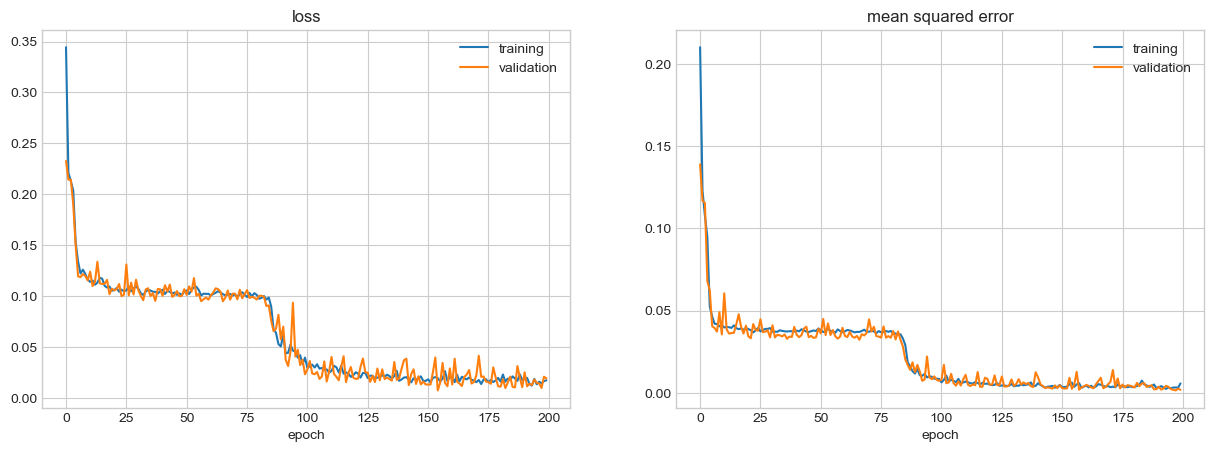

In [11]:
#from keras.callbacks import history 
print(history.history.keys())

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label = 'training')
plt.plot(history.history['val_loss'], label = 'validation')
plt.title('loss')
plt.xlabel('epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['mse'],label = 'training')
plt.plot(history.history['val_mse'], label = 'validation')
plt.title('mean squared error')
plt.xlabel('epoch')
plt.legend()


plt.show()

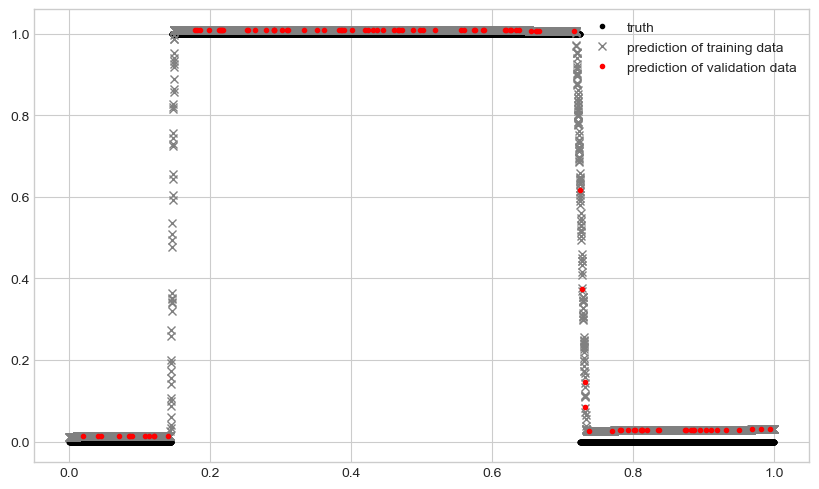

In [12]:
ypred = model.predict(x)

# create new samples in x
px = np.random.random((100 ,1))
# predict y
py = model.predict(px)

# plot predicted values
plt.figure(figsize=(10,6))
plt.plot(x, y, '.', color='black', label='truth')
plt.plot(x, ypred, 'x', color='gray', label='prediction of training data')
plt.plot(px, py, '.', color='red', label='prediction of validation data')
plt.legend()

#### Same example, but now with classification instead

In [21]:
y_class = np.asarray(np.round(y),dtype='int')
num_classes = len(np.unique(y_class))
print('classes = ' + str(np.unique(y_class)))

# number of units in each layer
n_units = 16

# define the model
tf.keras.backend.clear_session()
model = tf.keras.Sequential()

# Input layer is defined later

# First hidden layer: densely-connected layer with n_units units and activation function 'relu'.
model.add(layers.Dense(n_units, activation='relu'))
#model.add(layers.Dense(1, activation='linear'))

# Second hidden layer:
model.add(layers.Dense(n_units, activation='relu'))

# final layer:  just 1 node and no activation function
model.add(layers.Dense(num_classes,activation=None))

# normalize output to turn values into "likilihoods" that sum to 1.0
model.add(layers.Activation('softmax'))

model.compile(optimizer=keras.optimizers.Adam(0.01),  # Adam optimizer
            loss='sparse_categorical_crossentropy',       # mean absolute error = mae
            metrics=['accuracy'])  # mean squared error = mse

# Now train the model
# training input: x
# training output: y  
# Train on batches of 128 samples (chunk size).
# Epochs: run through all training data that many times. Order gets shuffled.
n_epochs = 200

history = model.fit(x, y_class, epochs=n_epochs, batch_size=128, verbose=0, validation_split=0.2, shuffle=True)   
print('done training')

# print(model.summary())

classes = [0 1]
done training


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


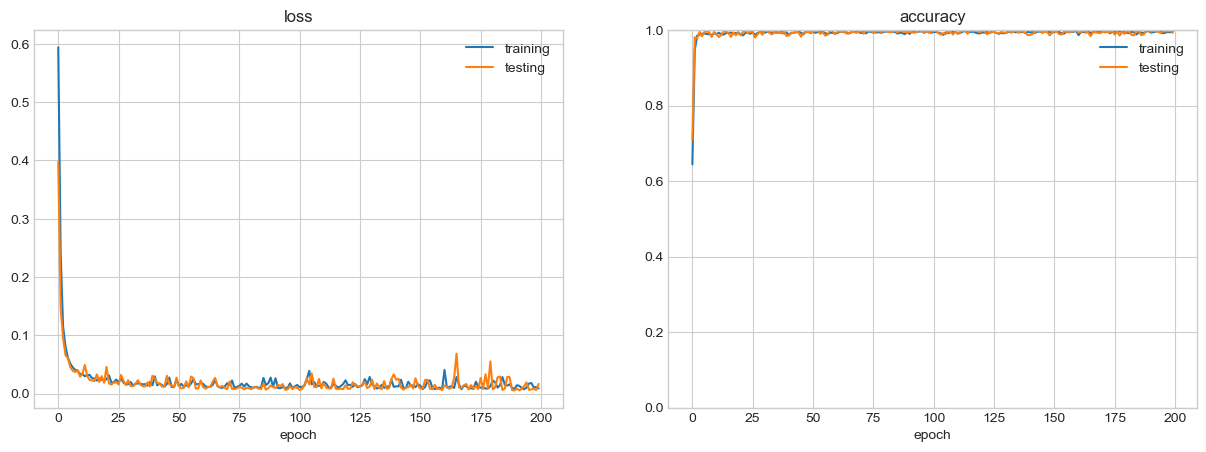

In [22]:
#from keras.callbacks import history 
print(history.history.keys())

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label = 'training')
plt.plot(history.history['val_loss'], label = 'testing')
plt.title('loss')
plt.xlabel('epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label = 'training')
plt.plot(history.history['val_accuracy'], label = 'testing')
plt.title('accuracy')
plt.ylim(0,1)
plt.xlabel('epoch')
plt.legend()


plt.show()

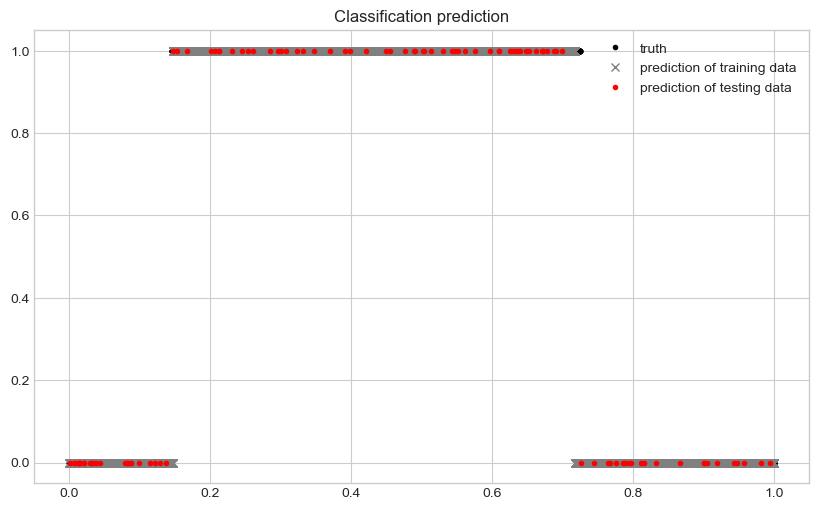

In [23]:
ypred_class = model.predict(x)
ypred = np.argmax(ypred_class,axis=1)

# create new samples in x
px = np.random.random((100 ,1))
# predict y
py_class = model.predict(px)
py = np.argmax(py_class,axis=1)

# plot predicted values
plt.figure(figsize=(10,6))
plt.plot(x, y, '.', color='black', label='truth')
plt.plot(x, ypred, 'x', color='gray', label='prediction of training data')
plt.plot(px, py, '.', color='red', label='prediction of testing data')
plt.legend()
plt.title('Classification prediction')
plt.show()

#### Let's look at one particular prediction output by the classifier ANN

In [24]:
print('prediction output shape = ' + str(ypred_class.shape))
sample = 44

print('-----------------------------------------')
print('Sample = ' + str(sample) + ', value = ' + str(y_class[sample]))
print('Prediction Liklihood [0] = ' + str(ypred_class[sample][0]))
print('Prediction Liklihood [1] = ' + str(ypred_class[sample][1]))
print('-----------------------------------------')

prediction output shape = (10000, 2)
-----------------------------------------
Sample = 44, value = [0]
Prediction Liklihood [0] = 0.9997507
Prediction Liklihood [1] =0.00024934186
-----------------------------------------
